# Ionesoft - Corrected labels
Date: 30.03.2019

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

extract = '../02_data_review/korrekturen_ionesoft/ionesoft_dqa_corrected.csv'
names=['ticket', 'type', 'client', 'issuer', 'inquiry', 'answer']

corpus = pd.read_csv(extract, sep=',', encoding='ansi', names=names, skiprows=[0])
corpus['ticket'] = corpus['ticket'].astype(str)

corpus.head()

,ticket,type,client,issuer,inquiry,answer
0,2019030563000120.0,Fehler in der App,SVBA,3,ich kann die bilder in übungen nicht bearbeite...,Fehlerbericht senden
1,2019030463000110.0,Fehler in der App,FOMA,3,lückentexte weg daten verloren gegangen von pp...,Fehlerbericht senden
2,2019022863000110.0,Anmeldung / Aktivierung,AGVS,3,bitte deaktivieren sie dieses gerät. vielen dank.,"Gerät entfernt, neu starten"
3,2019022863000020.0,Geräteanzahl überschritten,BEOOK,3,ich habe einen neuen laptop und möchte den alt...,"Gerät entfernt, neu starten"
4,2019022763000080.0,Geräteanzahl überschritten,BEOOK,3,offenbar habe ich die geräteanzahl überschritt...,"Gerät entfernt, neu starten"


#### The corpus has 891 data sets.

In [4]:
len(corpus)

888

#### Duplicates and null values are already eliminated

In [5]:
corpus['inquiry'] = corpus['inquiry'].str.lower()
corpus.duplicated(subset='inquiry').sum()

0

#### Distribution of answers to questions

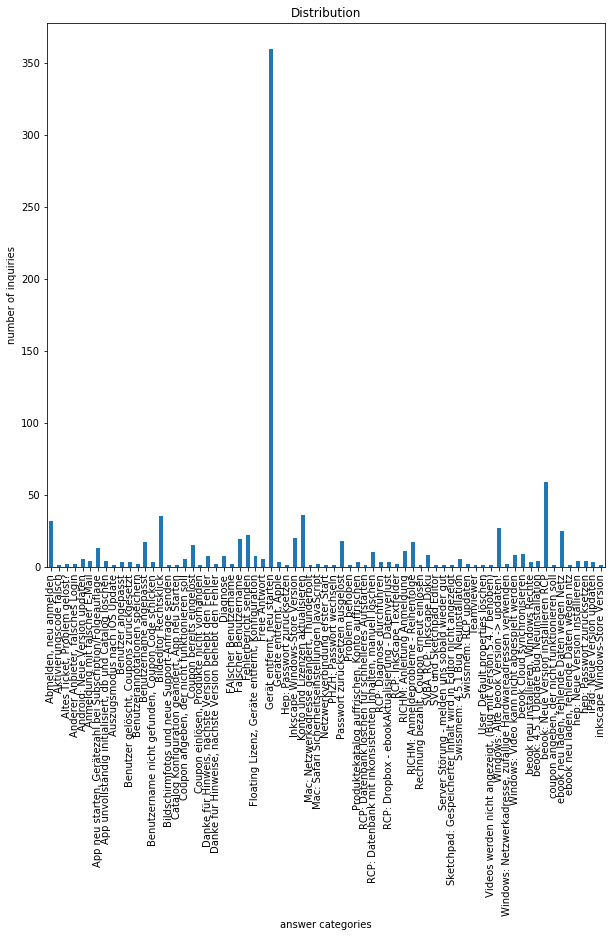

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(10, 10))

corpus.groupby('answer').inquiry.count().plot.bar(ylim=0)
plt.title('Distribution')
plt.xlabel('answer categories')
plt.ylabel('number of inquiries')
plt.show()

#### The top 15 answer categories

In [7]:
answers_count = corpus.groupby('answer').inquiry.count()
answers_count.sort_values(ascending=False).head(15)

answer
Gerät entfernt, neu starten                                  360
beook: Neue Version installieren RCP                          59
Konto und Lizenzen aktualisieren                              36
Bildeditor Rechtsklick                                        35
Abmelden, neu anmelden                                        32
Windows: Alte beook Version -> updaten!                       27
ebook neu laden, fehlende Daten wegen Netz                    25
Fehlerbericht senden                                          22
Inkscape Windows-Store Version                                20
Falscher Benutzername                                         19
Passwort zurücksetzen ausgelöst                               18
Benutzername angepasst                                        17
RICHM: Anmeldeprobleme - Reihenfolge                          17
Coupon bereits eingelöst                                      15
App neu starten, Gerätezahl bei Subscription/Folgeauflage     13
Name: inquiry, dty